## this is the __Original model__
## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T15', 'T29', 'T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
Classification_ValueCounts_values = application_df['CLASSIFICATION'].value_counts().values
top_Classifications_ValueCounts = application_df['CLASSIFICATION'].value_counts()[Classification_ValueCounts_values > 1]
top_Classifications_ValueCounts

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
Classification_ValueCounts_values = application_df['CLASSIFICATION'].value_counts().values
replacement_Classifications_ValueCounts = application_df['CLASSIFICATION'].value_counts()[Classification_ValueCounts_values < 1000]
classifications_to_replace = list(replacement_Classifications_ValueCounts.index)
classifications_to_replace

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [9]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [10]:
# Generate our categorical variable lists
features = application_df.drop(columns='IS_SUCCESSFUL')
categorical_features = features.select_dtypes(exclude='number')
categorical_features.head(3)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,T10,Independent,C1000,ProductDev,Association,0,N
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N


In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_features_onehot = pd.get_dummies(categorical_features, dtype=int)
categorical_features_onehot.shape

(34299, 41)

In [12]:
 # Merge one-hot encoded features and numeric features
numeric_features = features.select_dtypes(include='number')
all_features = pd.concat([
    numeric_features, categorical_features_onehot],
                                axis=1
)
all_features.head(3)

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']  # this is the target
# X = all_features                     this is the features

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    all_features, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
import keras
from keras import layers

In [16]:
number_input_features = len(X_train_scaled[0])
number_input_features

43

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
deep_model = keras.Sequential()
input_layer = keras.Input(shape=(number_input_features,))
deep_model.add(input_layer)

# First hidden layer
deep_model.add(layers.Dense(80, activation="relu"))

# Second hidden layer
deep_model.add(layers.Dense(30, activation="relu"))

# Output layer
deep_model.add(layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
deep_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 80)                  │           3,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,981 (23.36 KB)

 Trainable params: 5,981 (23.36 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile the model
deep_model.compile(
        optimizer=keras.optimizers.RMSprop(),  # Optimizer
        # Loss function to minimize
        loss=keras.losses.BinaryCrossentropy(),
        # List of metrics to monitor
        metrics=[keras.metrics.BinaryAccuracy()],
    )

In [19]:
# Train the model
history = deep_model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=.2,
)

Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.7120 - loss: 0.5856 - val_binary_accuracy: 0.7211 - val_loss: 0.5701
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.7297 - loss: 0.5586 - val_binary_accuracy: 0.7203 - val_loss: 0.5707
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.7342 - loss: 0.5475 - val_binary_accuracy: 0.7275 - val_loss: 0.5714
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.7326 - loss: 0.5517 - val_binary_accuracy: 0.7246 - val_loss: 0.5692
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.7373 - loss: 0.5464 - val_binary_accuracy: 0.7223 - val_loss: 0.5666
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.7345 - loss: 0.5499 - val_binary_accuracy: 0.7195 - val_loss: 0.5692
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.7319 - loss: 0.5468 - val_binary_accuracy: 0.7221 - val_loss: 0.5666

In [20]:
histories = pd.DataFrame(history.history)
histories.head()

,binary_accuracy,loss,val_binary_accuracy,val_loss
0,0.724282,0.570842,0.721088,0.570108
1,0.732397,0.555896,0.720311,0.570664
2,0.730356,0.552646,0.727502,0.571412
3,0.733855,0.550351,0.724587,0.569163
4,0.733466,0.549200,0.722255,0.566581


<Axes: >

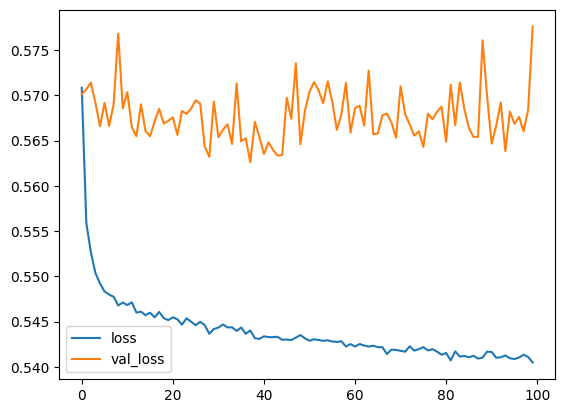

In [21]:
histories[['loss', 'val_loss']].plot()

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = deep_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 1ms/step - binary_accuracy: 0.7262 - loss: 0.5684
Loss: 0.5683742761611938, Accuracy: 0.7261807322502136


In [26]:
# need to load 'drive' in order to export files to Colab directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
# Export our model to HDF5 file
HDF5_file_path = '/content/drive/My Drive/AlphabetSoupCharity.h5'
deep_model.save(HDF5_file_path, overwrite=True, save_format='h5')

In [27]:
# because of the warning that h5 is a legacy format, save the model also in keras format
colab_file_path = '/content/drive/My Drive/AlphabetSoupCharity.keras'

In [28]:
deep_model.save(colab_file_path)
